    # Initial Data Analysis (DTU-Experiment)

The following notebook consists of the initial look at the provided data.

## Data description and experimental setup

We have different physiological measurements from the Empatice E4 wristband (TODO: read reference papers). The data is collected over three phases with identical experimental setups $(D_{1,1}, D_{1,2}, D_{1,3})$ conducted at different times of the year. 

Each partiticpant was provided an E4 biosensor and informed on how to wear it, turn it on and mark events. Biosignals was collected during three periods; resting, emotion-eliciting, and recovery period. After each phase participants completed a questionnaire. This procedure was repeated four times. After recovery period the biosensors was turned off. When they were turned on, it was allowed one minut for calibration. For resting and recovery, the participants was instructed to find a comfortable position and rest to the best of their ability. To elicit emotion, a game-elicited-emotion paradigm was used (Tangram task):

1. Pre-/Post-puzzle phase: Before and after the stress-inducing task participants will be asked to find a comfortable sitting position and sit quietly for 5 minutes.

2. Stress/frustration condition: Participants are divided in miltiple teams of 2 and compete in a puzzle competition.

Competition descripion:

* 4 rounds (total of 72 min)

* Objective; Solve as many Tangram puzzles in total during the 4 rounds

* A solved puzzle yields 1 point, teams with most points win (competition between two teams each consisting of two individuals)

Hence, a round consists of 1+3 phases:

* wristband calibration (1 minute)

* pre-task resting (5 minutes),

* task solving (5 minutes),

* post-task resting (5 minutes).

* 60 seconds at the end of the pre-task and task phases are reserved to answer the emotion evaluation questionnaire.

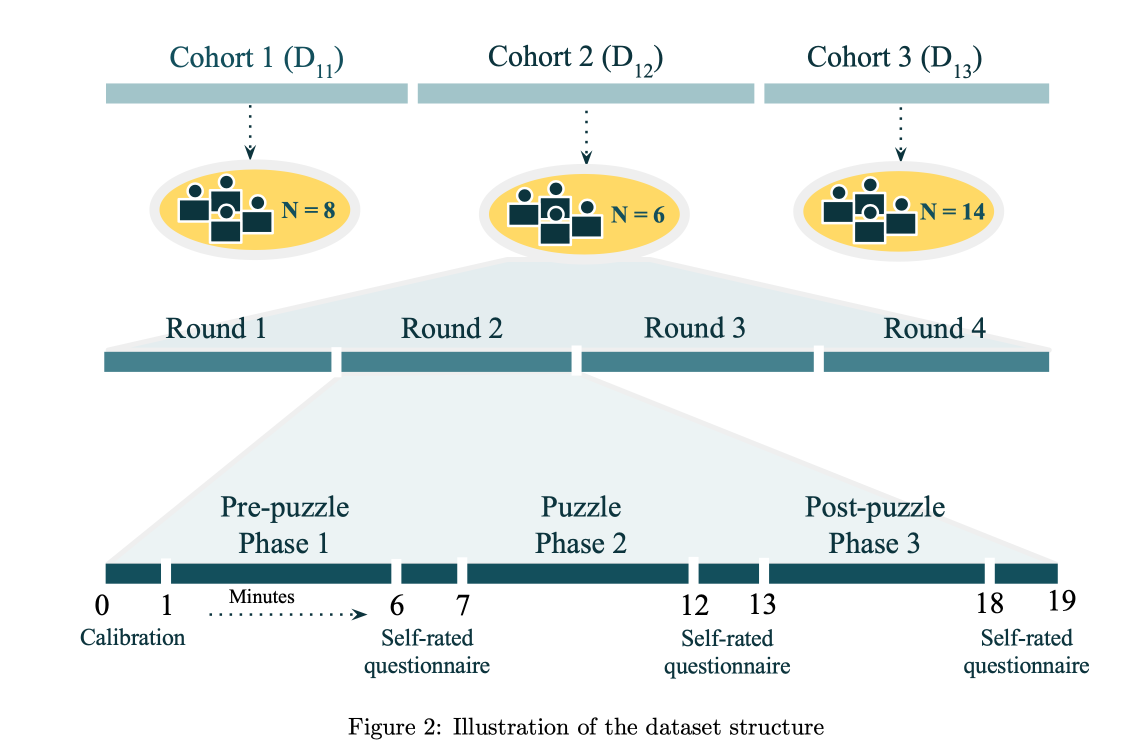


A team is handed a 7-piece tangram puzzle and a set of sketches. Teams are divided into roles; instructure, solver. Solver is the only one allowed to touch puzzle pieces. Instructure is the only one to see the solution. 

A round consisted of seven phases, calibration, pre-puzzle and post-puzzle
rest, puzzling, and recording emotions (self-rated questionnaire), organised as shown in Fig. 2.

## Participation

Participants (total N = 28) were recruited from our interdisciplinary research group and students
and employees within a university department. The ages of the participating women and men ranged
from approximately 20 to 42 years. The experiment was run on three separate occasions. D11 were
completed in the winter and D12 and D13 were completed in the fall. D13 were conducted in four
separate sessions; D131 and D133 were completed in the morning and D132 and D134 were collected in
the evening. Data from two participants were removed due to device malfunction. Therefore, there is
data from N = 26 individuals in the dataset

Thoughts to above: We seem to have different and unbalanced levels. More specifically, $D_{1,3}$ have measurements bot in the morning and evening.

## E4 biosensor
The dataset is compromised of:

* electrodermal activity (EDA)

* heart-rate (HR)

* temperature (TEMP)

* blood-volume pilse (BVP)

Each participant has 4x3 recordings corresponding to the four rounds and three phases. The data from the biosensor is stored for each individual as `biosignal.csv`.

## Response questionaire
International PANAS questionnaire was used. It includes five positive and five negative emotions (1-5). They also assess difficulty of task and frustration level (0-10).

# Time to get our hands dirty

First we will reproduce the figures presented in the descriptions:

In [54]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path

def setup_mpl():
    mpl.rcParams['font.family'] = 'Times New Roman'
    mpl.rcParams['lines.linewidth'] = 2
    return None
setup_mpl()

In [86]:
columns = ['ID', 'time', 'D', 'round', 'phase', 'BVP', 'EDA', 'HR', 'TEMP']
df = pd.DataFrame(columns=columns)

for d in Path('../data/raw/dataset').glob('D1_*'):
    for id_ in d.glob('ID_*'):
        for round in id_.glob('round_*'):
            for phase in round.glob('phase*'):
                dataframes = []
                for file in phase.glob('*.csv'):
                    if file.name not in ('response.csv',):
                        temp_df = pd.read_csv(file, index_col=None)
                        temp_df['time'] = pd.to_datetime(temp_df['time'])
                        dataframes.append(temp_df)
                    
                bvp_df, eda_df, hr_df, t_df = dataframes[0], dataframes[1], dataframes[2], dataframes[3]

                merged_df = pd.merge(bvp_df, eda_df, on='time')
                merged_df = pd.merge(merged_df, hr_df, on='time')
                merged_df = pd.merge(merged_df, t_df, on='time')
                merged_df['round'] = round.name[-1]
                merged_df['phase'] = phase.name[-1]
                merged_df['ID'] = id_.name[-1]
                merged_df['D'] = d.name
                df = pd.concat([df, merged_df[columns]], ignore_index=True)

/var/folders/w8/wb7dt4yd6ys326nsmh5q64200000gn/T/ipykernel_948/1217976952.py:19: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.

/var/folders/w8/wb7dt4yd6ys326nsmh5q64200000gn/T/ipykernel_948/1217976952.py:19: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.

/var/folders/w8/wb7dt4yd6ys326nsmh5q64200000gn/T/ipykernel_948/1217976952.py:19: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.

/var/folders/w8/wb7dt4yd6ys326nsmh5q64200000gn/T/ipykernel_948/1217976952.py:19: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.

/var/folders/w8/wb7dt4yd6ys326nsmh5q

In [87]:
df

ID                time       D round phase     BVP       EDA     HR  \
0      8 2021-12-17 16:32:13    D1_1     1     3  144.11  0.549724  69.35   
1      8 2021-12-17 16:32:14    D1_1     1     3  548.76  0.489498  69.50   
2      8 2021-12-17 16:32:15    D1_1     1     3   28.69  0.506156  69.63   
3      8 2021-12-17 16:32:16    D1_1     1     3   78.84  0.535629  69.80   
4      8 2021-12-17 16:32:17    D1_1     1     3   93.13  0.524096  69.97   
...   ..                 ...     ...   ...   ...     ...       ...    ...   
96951  3 2022-10-26 10:19:05  D1_3_1     2     1   -9.21  1.823529  82.03   
96952  3 2022-10-26 10:19:06  D1_3_1     2     1   22.11  1.817124  82.00   
96953  3 2022-10-26 10:19:07  D1_3_1     2     1  -12.80  1.820967  81.97   
96954  3 2022-10-26 10:19:08  D1_3_1     2     1   29.75  1.808157  81.95   
96955  3 2022-10-26 10:19:09  D1_3_1     2     1  -17.54  1.801752  81.97   

        TEMP  
0      31.17  
1      31.13  
2      31.13  
3      31.15  
4      31.13  
...      ...  
96951  32.37  
96952  32.37  
96953  32.39  
96954  32.39  
96955  32.41  

[96956 rows x 9 columns]

In [88]:
df.to_csv('processed_data.csv')

## Visualisations

In [89]:
df = pd.read_csv("processed_data.csv")

In [90]:
phases = df.phase.unique()
rounds = df['round'].unique()
subset = df[df['round']==rounds[0]]

In [91]:
subset

Unnamed: 0  ID                 time       D  round  phase     BVP  \
0               0   8  2021-12-17 16:32:13    D1_1      1      3  144.11   
1               1   8  2021-12-17 16:32:14    D1_1      1      3  548.76   
2               2   8  2021-12-17 16:32:15    D1_1      1      3   28.69   
3               3   8  2021-12-17 16:32:16    D1_1      1      3   78.84   
4               4   8  2021-12-17 16:32:17    D1_1      1      3   93.13   
...           ...  ..                  ...     ...    ...    ...     ...   
94309       94309   3  2022-10-26 09:57:45  D1_3_1      1      1    3.04   
94310       94310   3  2022-10-26 09:57:46  D1_3_1      1      1   -0.95   
94311       94311   3  2022-10-26 09:57:47  D1_3_1      1      1    2.88   
94312       94312   3  2022-10-26 09:57:48  D1_3_1      1      1   -1.22   
94313       94313   3  2022-10-26 09:57:49  D1_3_1      1      1   33.28   

            EDA     HR   TEMP  
0      0.549724  69.35  31.17  
1      0.489498  69.50  31.13  
2      0.506156  69.63  31.13  
3      0.535629  69.80  31.15  
4      0.524096  69.97  31.13  
...         ...    ...    ...  
94309  3.203543  89.50  33.39  
94310  3.226604  89.53  33.39  
94311  3.208668  89.55  33.39  
94312  3.230448  89.60  33.39  
94313  3.547532  89.65  33.39  

[25558 rows x 10 columns]

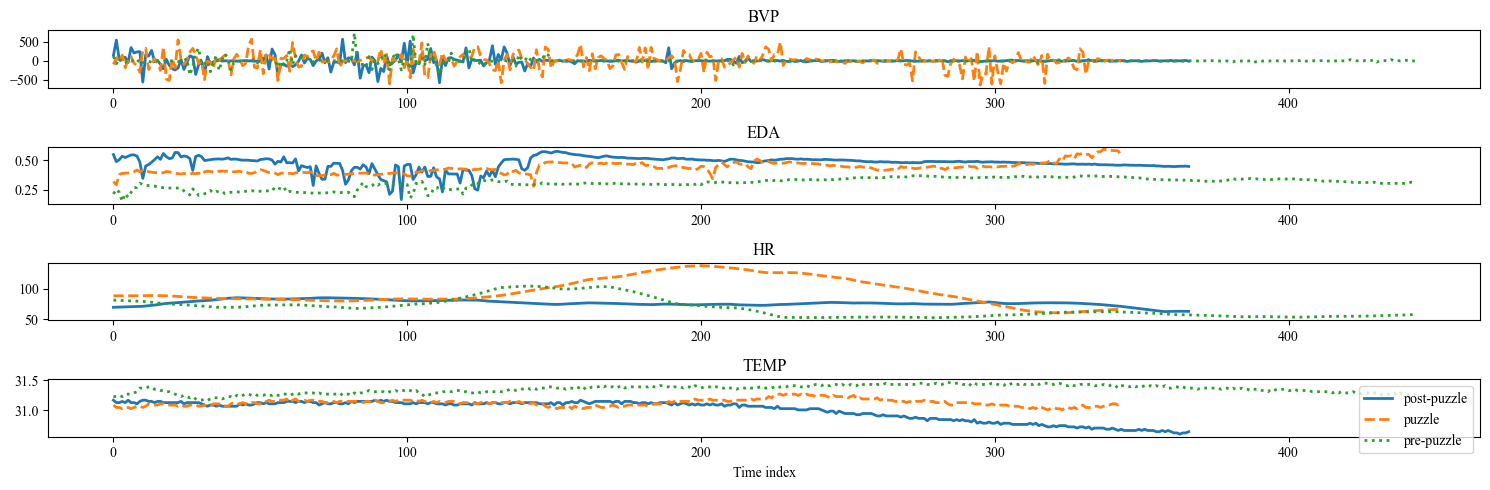

In [95]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,5), dpi=100)

phase_map = {1: 'pre-puzzle',
             2: 'puzzle',
             3: 'post-puzzle'}

lstyle = ['solid', 'dashed', 'dotted']
for style, phase in enumerate(phases):
    temp_df = subset[((subset.phase == phase) & (subset.ID == 8))]
    ax1.plot([i for i in range(len(temp_df.BVP))], temp_df.BVP, linestyle=lstyle[style], label=phase_map[phase])
    ax2.plot([i for i in range(len(temp_df.EDA))], temp_df.EDA, linestyle=lstyle[style], label=phase_map[phase])
    ax3.plot([i for i in range(len(temp_df.HR))], temp_df.HR, linestyle=lstyle[style], label=phase_map[phase])
    ax4.plot([i for i in range(len(temp_df.TEMP))], temp_df.TEMP, linestyle=lstyle[style], label=phase_map[phase])

ax1.set_title('BVP')
ax2.set_title('EDA')
ax3.set_title('HR')
ax4.set_title('TEMP')
ax4.set_xlabel('Time index')
ax4.legend()
fig.tight_layout()
plt.show()

In [96]:
from sklearn.decomposition import PCA

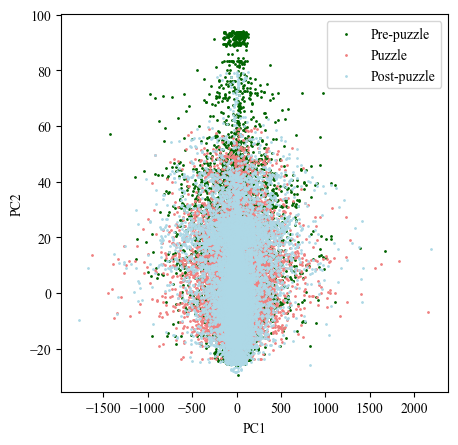

In [97]:
pca = PCA(n_components=2)

# Fit the PCA model to the data
X = df[['BVP', 'EDA', 'HR']].values
pca.fit(X)

# Transform the data into the new coordinate system defined by the first two principal components
X_pca = pca.transform(X)

phase1_idx = df['phase'] == 1
phase2_idx = df['phase'] == 2
phase3_idx = df['phase'] == 3

# Plot the first two principal components
fig, ax = plt.subplots(figsize=(5,5), dpi=100)
ax.scatter(X_pca[phase1_idx, 0], X_pca[phase1_idx, 1], s=1, c='darkgreen', label='Pre-puzzle')
ax.scatter(X_pca[phase2_idx, 0], X_pca[phase2_idx, 1], s=1, c='lightcoral', label='Puzzle')
ax.scatter(X_pca[phase3_idx, 0], X_pca[phase3_idx, 1], s=1, c='lightblue', label='Post-puzzle')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.legend()
plt.show()

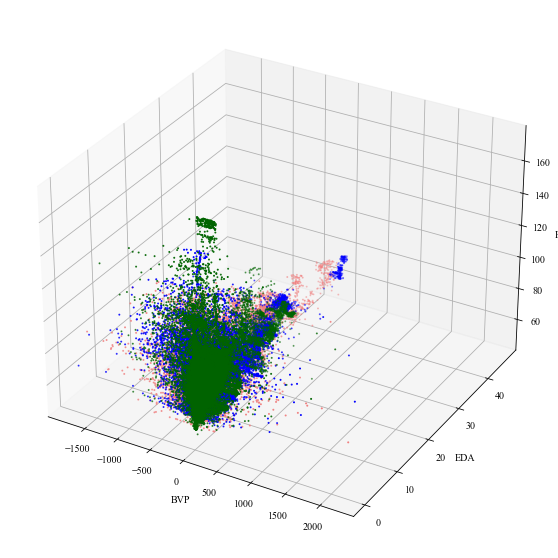

In [98]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
# Plot the data points
ax.scatter(X[phase1_idx,0], X[phase1_idx,1], X[phase1_idx,2], s=1, c='darkgreen')
ax.scatter(X[phase2_idx,0], X[phase2_idx,1], X[phase2_idx,2], s=1, c='lightcoral')
ax.scatter(X[phase3_idx,0], X[phase3_idx,1], X[phase3_idx,2], s=1, c='blue')

# Set axis labels
ax.set_xlabel('BVP')
ax.set_ylabel('EDA')
ax.set_zlabel('HR')

# Show the plot
plt.show()

In [99]:
import plotly.express as px

In [101]:
fig = px.scatter_3d(df, x='TEMP', y='EDA', z='HR', color='phase')
fig.update_traces(marker_size = 1)
fig

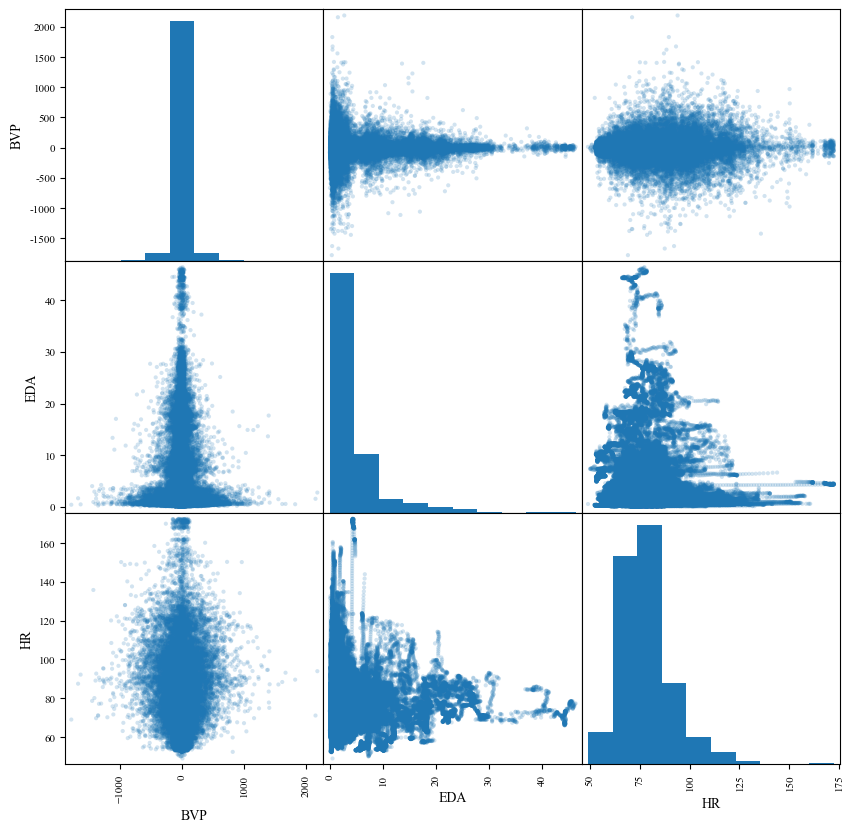

In [80]:
from pandas.plotting import scatter_matrix
fig, ax = plt.subplots(3, 3, figsize=(10,10), dpi=100)
scatter_matrix(df[['BVP', 'EDA', 'HR']], alpha=0.2, ax=ax)
plt.show()

# References that might be interesting:

https://link.springer.com/chapter/10.1007/978-3-030-88244-0_21

* Seems like they have the exact same type of data, a little bit different stress situation but quite similar

* They build a classifier